### Excercise 2:
In this tutorial, we will explore the LOFAR beamformed data.
By the end of this tutorial you will be able to:
1. Plot the radio dynamic spectrum from beamformed datacube.
2. Plot the beamformed solar image with contour lines.
3. Plot the beam pattern shape on top of the solar image.

The `fits` datacube file should be stored at `./data/` folder.

First we start by importing the required modules.

In [1]:
import sys
sys.path.insert(1, '../') # make sure to use the code in this repo

import lofarSun
from lofarSun.BF import BFdata
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# try to use the precise epoch
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'torch'

Load the datacube file.

In [2]:
dataset = BFdata.BFcube()
dataset.load_fits('./data/L698487.cube.fits')

NameError: name 'BFdata' is not defined

shape of the datacube file `(timesteps, frequencies, beams)`

`dataset.data_cube.shape ---> (480, 359, 127)`

Plot the dynamic spectrum at the central beam `beam_idx = 0`.

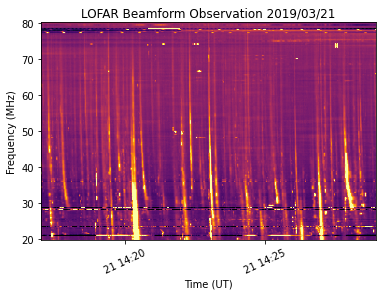

In [4]:
dataset.plot_bf_dyspec(beam_idx=0)

Select the observation frequency and time to extract the corresponding image from the datacube.
It will print out the indices of the time and frequency.

In [5]:
freq = 60
dtime = datetime.datetime(2019, 3, 21, 14, 20, 20, 486000, tzinfo=datetime.timezone.utc)
time = mdates.date2num(dtime)
X, Y, data_bf, x, y, Ibeam = dataset.bf_image_by_freq_time(freq, time, asecpix=20, extrap=True, interpm='cubic')

[100, 158]


Show the image of the Sun at that particular time and frequency.

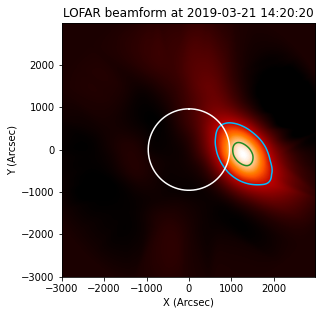

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
im = ax.imshow(data_bf, cmap='gist_heat', origin='lower',
               extent=[np.min(X),np.max(X), np.min(Y),np.max(Y)])
ax.contour(X, Y, data_bf/np.max(data_bf), levels=[0.5,0.9],
           colors=['deepskyblue','forestgreen'])
ax.plot(960*np.sin(np.arange(0,2*np.pi,0.001)), 
        960*np.cos(np.arange(0,2*np.pi,0.001)), 
        'w')
ax.set_xlabel('X (Arcsec)')
ax.set_ylabel('Y (Arcsec)')
ax.set_title(f'LOFAR beamform at {str(dtime)[0:19]}')
ax.set_aspect('equal', 'box')
ax.get_images()[0].set_clim([0, np.max(data_bf)])

Fit a Gaussian distribution on the source of emission at a specific frequency index and time index, and show the beams pattern.

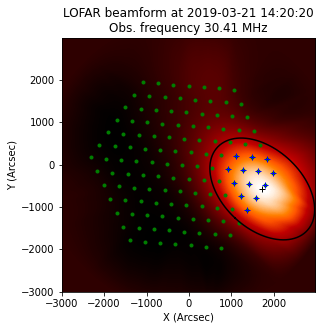

In [51]:
frequency_index = 52
timestep_index = 100

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
im = dataset.bf_fit_gauss_source_by_idx(frequency_index, timestep_index, verb=False)
ax.set_xlabel('X (Arcsec)')
ax.set_ylabel('Y (Arcsec)')
bf_time = mdates.num2date(dataset.time_ds[timestep_index])
ax.set_title(f'LOFAR beamform at {str(bf_time)[0:19]}\nObs. frequency {dataset.freqs_ds[frequency_index]:.2f} MHz')
ax.set_aspect('equal', 'box')

In [52]:
# show more info
im

({'s0': 151891705149706.66,
  'x_cent': 1728.8969944520807,
  'y_cent': -575.0156162655562,
  'tile': 2.320250686948291,
  'x_sig': 939.8153349838635,
  'y_sig': 1443.6875097874417},
 {'s0_err': 8.000308583725339e+22,
  'x_cent_err': 189.8309403567622,
  'y_cent_err': 123.43829079490087,
  'tile_err': 0.00024930101763255525,
  'x_sig_err': 46.64415808724564,
  'y_sig_err': 757.8442768077687})